In [1]:
# Monte le google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importer pandas, numpy, pymssql, et mysql
Cette étape suppose que vous avez installé les API pymssql et mysql (pip
install pymssql or pip install mysql-connector-python )

In [2]:
# installé les API pymssql et mysql
!pip install pymssql
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 17.3 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
import pymssql
import mysql.connector
import missingno as msno
import matplotlib.pyplot as plt

# Créer une connexion aux données du serveur SQL  en passant les informations d'identification de la base de données à la fonction pymssql

In [4]:
server = "pdcc.c9sqqzd5fulv.us-west-2.rds.amazonaws.com"

In [5]:
user = "pdccuser"
password = "pdccpass"
database = "pdcctest"
conn = pymssql.connect(server=server, user=user, password=password, database=database)

# Sélectionner les colonnes que nous voulons à partir des données du serveur SQL et utiliser des alias SQL pour améliorer les noms de colonnes (par exemple, fedu AS fathereducation)

In [6]:
query = "SELECT studentid, school, sex, age, famsize,\
  medu AS  mothereducation, fedu AS fathereducation,\
  traveltime, studytime, failures, famrel, freetime,\
  goout, g1 AS gradeperiod1, g2 AS gradeperiod2,\
  g3 AS gradeperiod3 From studentmath"

# Créez une data frame pandas  en passant l'instruction SELECT et l'objet de connexion à read_sql

In [12]:
studentmath = pd.read_sql(query,conn)
conn.close()

In [13]:
studentmath.head()

,studentid,school,sex,age,famsize,mothereducation,fathereducation,traveltime,studytime,failures,famrel,freetime,goout,gradeperiod1,gradeperiod2,gradeperiod3
0,001,GP,F,18,GT3,4,4,2,2,0,4,3,4,5,6,6
1,002,GP,F,17,GT3,1,1,1,2,0,5,3,3,5,5,6
2,003,GP,F,15,LE3,1,1,1,2,3,4,3,2,7,8,10
3,004,GP,F,15,GT3,4,2,1,3,0,3,2,2,15,14,15
4,005,GP,F,16,GT3,3,3,1,2,0,4,3,2,6,10,10


<Axes: >

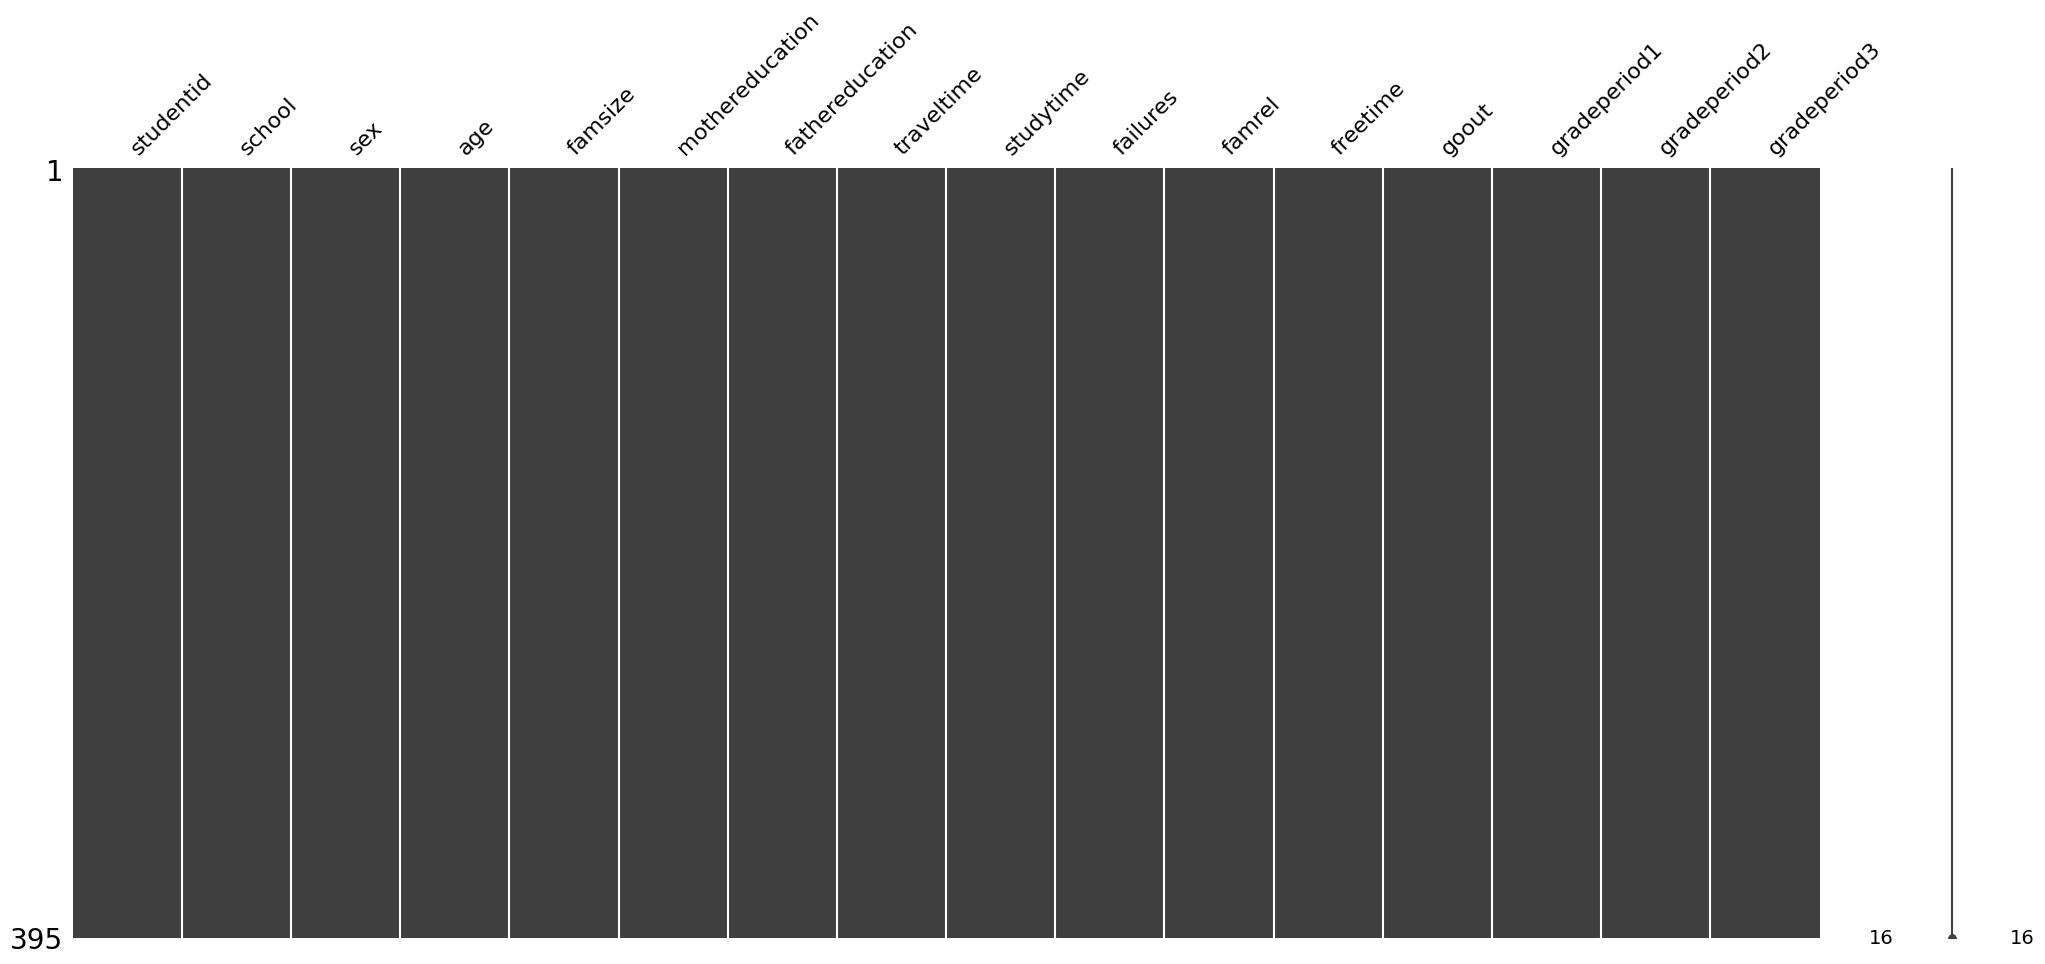

In [16]:
msno.matrix(studentmath)

In [ ]:
studentmath.dtypes

studentid          object
school             object
sex                object
age                 int64
famsize            object
mothereducation     int64
fathereducation     int64
traveltime          int64
studytime           int64
failures            int64
famrel              int64
freetime            int64
goout               int64
gradeperiod1        int64
gradeperiod2        int64
gradeperiod3        int64
dtype: object

# (Alternative) Utilisez le connecteur mysql et read_sql  pour obtenir des données de MySQL

In [ ]:
host = "pdccmysql.c9sqqzd5fulv.us-west-2.rds.amazonaws.com"
user = "pdccuser"
password = "pdccpass"
database = "pdccschema"
connmysql = mysql.connector.connect(host=host, database=database,user=user,password=password)
studentmath = pd.read_sql(query,connmysql)
connmysql.close()

/tmp/ipykernel_10755/338334575.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  studentmath = pd.read_sql(query,connmysql)


In [ ]:
studentmath.dtypes

studentid          object
school             object
sex                object
age                 int64
famsize            object
mothereducation     int64
fathereducation     int64
traveltime          int64
studytime           int64
failures            int64
famrel              int64
freetime            int64
goout               int64
gradeperiod1        int64
gradeperiod2        int64
gradeperiod3        int64
dtype: object

In [ ]:
studentmath.head()

,studentid,school,sex,age,famsize,mothereducation,fathereducation,traveltime,studytime,failures,famrel,freetime,goout,gradeperiod1,gradeperiod2,gradeperiod3
0,001,GP,F,18,GT3,4,4,2,2,0,4,3,4,5,6,6
1,002,GP,F,17,GT3,1,1,1,2,0,5,3,3,5,5,6
2,003,GP,F,15,LE3,1,1,1,2,3,4,3,2,7,8,10
3,004,GP,F,15,GT3,4,2,1,3,0,3,2,2,15,14,15
4,005,GP,F,16,GT3,3,3,1,2,0,4,3,2,6,10,10


# Réorganiser les colonnes, définir un index et vérifier les valeurs manquantes

- Déplacer les données relatives aux notes à gauche du data frame juste après studentid.
- Déplacer également la colonne freetime vers la droite, après traveltime et studytime.

In [ ]:
newcolorder =['studentid', 'gradeperiod1', 'gradeperiod2', 'gradeperiod3', 'school', 'sex', 'age', 'famsize',
              'mothereducation', 'fathereducation', 'traveltime', 'studytime', 'freetime','failures', 'famrel',
              'goout']

In [ ]:
studentmath = studentmath[newcolorder]

In [ ]:
studentmath

,studentid,gradeperiod1,gradeperiod2,gradeperiod3,school,sex,age,famsize,mothereducation,fathereducation,traveltime,studytime,freetime,failures,famrel,goout
0,001,5,6,6,GP,F,18,GT3,4,4,2,2,3,0,4,4
1,002,5,5,6,GP,F,17,GT3,1,1,1,2,3,0,5,3
2,003,7,8,10,GP,F,15,LE3,1,1,1,2,3,3,4,2
3,004,15,14,15,GP,F,15,GT3,4,2,1,3,2,0,3,2
4,005,6,10,10,GP,F,16,GT3,3,3,1,2,3,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,9,9,9,MS,M,20,LE3,2,2,1,2,5,2,5,4
391,392,14,16,16,MS,M,17,LE3,3,1,2,1,4,0,2,5
392,393,10,8,7,MS,M,21,GT3,1,1,1,1,5,3,5,3
393,394,11,12,10,MS,M,18,LE3,3,2,3,1,4,0,4,1


- Confirmer que chaque ligne a un ID et que les ID sont uniques.

In [ ]:
studentmath.studentid.count()

395

In [ ]:
studentmath.studentid.nunique()

395

Il ya 395 StudentID et 395 valeurs unique de StudentID

In [ ]:
studentmath.index

RangeIndex(start=0, stop=395, step=1)

- Définir studentid comme index.

In [ ]:
studentmath.set_index('studentid', inplace=True)

In [ ]:
studentmath.index

Index(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010',
       ...
       '386', '387', '388', '389', '390', '391', '392', '393', '394', '395'],
      dtype='object', name='studentid', length=395)

- Utiliser la fonction count du data frame pour vérifier les valeurs
manquantes

In [ ]:
studentmath.count()

gradeperiod1       395
gradeperiod2       395
gradeperiod3       395
school             395
sex                395
age                395
famsize            395
mothereducation    395
fathereducation    395
traveltime         395
studytime          395
freetime           395
failures           395
famrel             395
goout              395
dtype: int64

# Remplacer les valeurs de données codées par des valeurs plus informatives

- Créer un dictionnaire pour remplacer les valeurs des colonnes par des valeurs plus significatives
  - famrel : 1-->1:very bad , 2-->2:bad, 3-->3:neutral, 4-->4:good, 5-->5:excellent
  - freetime : 1-->1:very low , 2-->2:low, 3-->3:neutral, 4-->4:high, 5-->5:very high
  - goout : 1-->1:very low , 2-->2:low, 3-->3:neutral, 4-->4:high, 5-->5:very higt
  - mothereducation : voir resultas
  - fathereducation : voir resultas


In [17]:
setvalues={"famrel":{1:"1:very bad", 2:"2:bad", 3:"3:neutral", 4:"4:good", 5:"5:execellent"},
           "freetime":{1:"1:very low", 2:"2:low", 3:"3:neutral", 4:"4:high", 5:"5:very high"},
          "goout":{1:"1:very low", 2:"2:low", 3:"3:neutral", 4:"4:high", 5:"5:very high"},
          "mothereducation":{0:np.nan,1:"1:k-4", 2:"5-9", 3:"3:secondary education", 4:"4:higher ed"},
          "fathereducation":{0:np.nan,1:"1:k-4", 2:"5-9", 3:"3:secondary education", 4:"4:higher ed"},}

- Utiliser la commande replace pour insérer ces valeurs :

In [18]:
studentmath.replace(setvalues, inplace=True)

In [19]:
studentmath

,studentid,school,sex,age,famsize,mothereducation,fathereducation,traveltime,studytime,failures,famrel,freetime,goout,gradeperiod1,gradeperiod2,gradeperiod3
0,001,GP,F,18,GT3,4:higher ed,4:higher ed,2,2,0,4:good,3:neutral,4:high,5,6,6
1,002,GP,F,17,GT3,1:k-4,1:k-4,1,2,0,5:execellent,3:neutral,3:neutral,5,5,6
2,003,GP,F,15,LE3,1:k-4,1:k-4,1,2,3,4:good,3:neutral,2:low,7,8,10
3,004,GP,F,15,GT3,4:higher ed,5-9,1,3,0,3:neutral,2:low,2:low,15,14,15
4,005,GP,F,16,GT3,3:secondary education,3:secondary education,1,2,0,4:good,3:neutral,2:low,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,LE3,5-9,5-9,1,2,2,5:execellent,5:very high,4:high,9,9,9
391,392,MS,M,17,LE3,3:secondary education,1:k-4,2,1,0,2:bad,4:high,5:very high,14,16,16
392,393,MS,M,21,GT3,1:k-4,1:k-4,1,1,3,5:execellent,5:very high,3:neutral,10,8,7
393,394,MS,M,18,LE3,3:secondary education,5-9,3,1,0,4:good,4:high,1:very low,11,12,10


In [31]:
studentmath.famrel.value_counts(normalize=True)

,proportion
famrel,
4:good,0.493671
5:execellent,0.268354
3:neutral,0.172152
2:bad,0.045570
1:very bad,0.020253


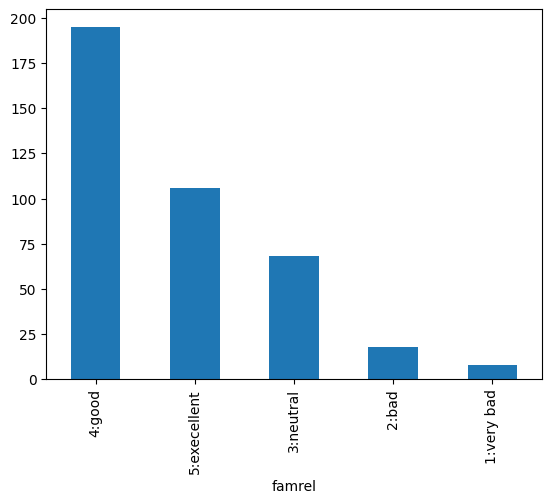

In [25]:
# Les valeurs de famrel
studentmath.famrel.value_counts().plot(kind='bar');

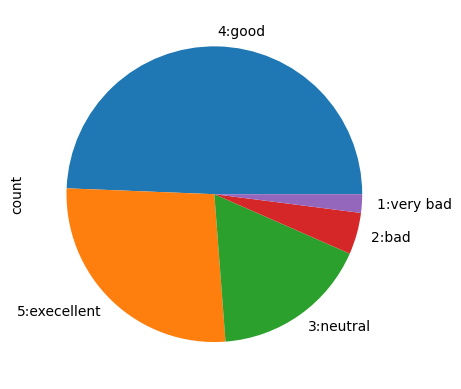

In [24]:
studentmath.famrel.value_counts().plot(kind='pie');

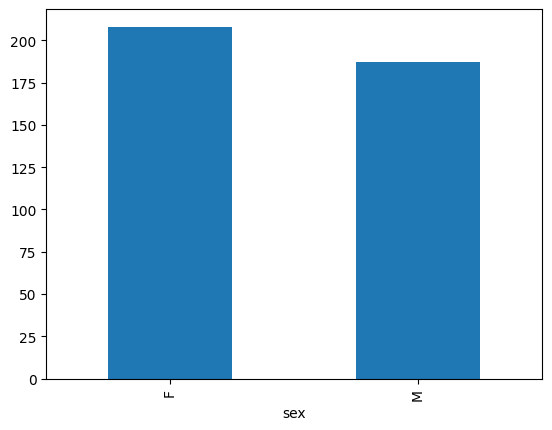

In [30]:
studentmath.sex.value_counts().plot(kind='bar') ;

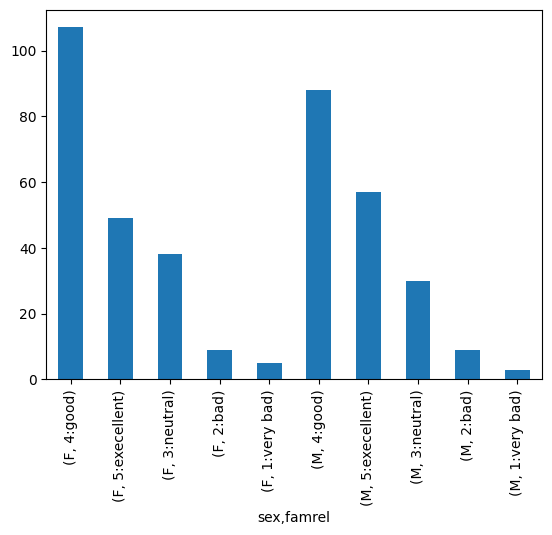

In [28]:
# EN fonction du sexe
studentmath.groupby('sex').famrel.value_counts().plot(kind='bar');

In [ ]:
studentmath

,gradeperiod1,gradeperiod2,gradeperiod3,school,sex,age,famsize,mothereducation,fathereducation,traveltime,studytime,freetime,failures,famrel,goout
studentid,,,,,,,,,,,,,,,
001,5,6,6,GP,F,18,GT3,4:higher ed,4:higher ed,2,2,3:neutral,0,4:good,4:high
002,5,5,6,GP,F,17,GT3,1:k-4,1:k-4,1,2,3:neutral,0,5:execellent,3:neutral
003,7,8,10,GP,F,15,LE3,1:k-4,1:k-4,1,2,3:neutral,3,4:good,2:low
004,15,14,15,GP,F,15,GT3,4:higher ed,5-9,1,3,2:low,0,3:neutral,2:low
005,6,10,10,GP,F,16,GT3,3:secondary education,3:secondary education,1,2,3:neutral,0,4:good,2:low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,9,9,9,MS,M,20,LE3,5-9,5-9,1,2,5:very high,2,5:execellent,4:high
392,14,16,16,MS,M,17,LE3,3:secondary education,1:k-4,2,1,4:high,0,2:bad,5:very high
393,10,8,7,MS,M,21,GT3,1:k-4,1:k-4,1,1,5:very high,3,5:execellent,3:neutral


- Changer le type des colonnes dont les données ont été modifiées en catégorie
- Vérifier si l'utilisation de la mémoire a changé

In [ ]:
setvalueskeys = [k for k in setvalues]

In [ ]:
studentmath[setvalueskeys].memory_usage(index=False)

famrel             3160
freetime           3160
goout              3160
mothereducation    3160
fathereducation    3160
dtype: int64

In [ ]:
for col in studentmath[setvalueskeys].columns:
    studentmath[col] = studentmath[col].astype('category')

- Vérifier si l'utilisation de la mémoire a changé

In [ ]:
studentmath[setvalueskeys].memory_usage(index=False)

famrel             607
freetime           607
goout              607
mothereducation    599
fathereducation    599
dtype: int64

# Calculer des pourcentages pour les valeurs de la colonne famrel

- Exécutez value_counts et définissez  normalize sur True pour générer des pourcentages

In [ ]:
studentmath['famrel'].value_counts(sort=False,normalize=True)

1:very bad      0.020253
2:bad           0.045570
3:neutral       0.172152
4:good          0.493671
5:execellent    0.268354
Name: famrel, dtype: float64

In [ ]:
studentmath['goout'].value_counts(sort=False,normalize=True)

1:very low     0.058228
2:low          0.260759
3:neutral      0.329114
4:high         0.217722
5:very high    0.134177
Name: goout, dtype: float64

- Utiliser l'option  apply pour calculer des pourcentages pour plusieurs colonnes ayant le mm types de categories
  - colonnes freetime et goout

In [ ]:
studentmath[['freetime','goout','fathereducation']].apply(pd.Series.value_counts,sort=False,normalize=True)

,freetime,goout,fathereducation
1:k-4,NaN,NaN,0.208651
1:very low,0.048101,0.058228,NaN
2:low,0.162025,0.260759,NaN
3:neutral,0.397468,0.329114,NaN
3:secondary education,NaN,NaN,0.254453
4:high,0.291139,0.217722,NaN
4:higher ed,NaN,NaN,0.244275
5-9,NaN,NaN,0.292621
5:very high,0.101266,0.134177,NaN


Les cols sont de mm types donc il ya un decalage dans les statistiques

  - colonnes mothereducation et fathereducation

In [ ]:
studentmath[['mothereducation','fathereducation']].apply(pd.Series.value_counts,sort=False,normalize=True)

,mothereducation,fathereducation
1:k-4,0.150510,0.208651
3:secondary education,0.252551,0.254453
4:higher ed,0.334184,0.244275
5-9,0.262755,0.292621
